In [4]:
import pandas as pd
import numpy as np

"""```````````````` Reading the data set```````````````````````````"""

d=pd.read_csv("healthcare-dataset-stroke-data.csv")


#Pre-processing the categorical data
gender = {'Male': 0, 'Female': 1, 'Other': 2}
Married = {'No': 0, 'Yes': 1}
Work_status= {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
Residence_type = {'Rural': 0, 'Urban': 1}
smoking = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

d['gender'] = d['gender'].map(gender)
d['ever_married'] = d['ever_married'].map(Married)
d['work_type'] = d['work_type'].map(Work_status)
d['Residence_type'] = d['Residence_type'].map(Residence_type)
d['smoking_status'] = d['smoking_status'].map(smoking)

print(d.shape)
d.isna().sum()
d.dropna(inplace=True)
d.reset_index(drop=True, inplace=True)
d.info()


"""`````````````````````Data Selection```````````````````````````````"""
# Reading the attributes along with discarding the ID attribute(Non-useful data)
X=d.iloc[:,1:12]
# Classificaiton attribute set
Y= d['stroke']
print(X)
print(X.iloc[0])
X.shape
print(Y)
Y.shape

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 460.3 KB
      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             1          3   
1     

(4909,)







<ipython-input-11-7770fb27f89e>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  sns_heatmap.get_figure().savefig("output.png",quality=100,dpi=400,pad_inches=0.5)


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

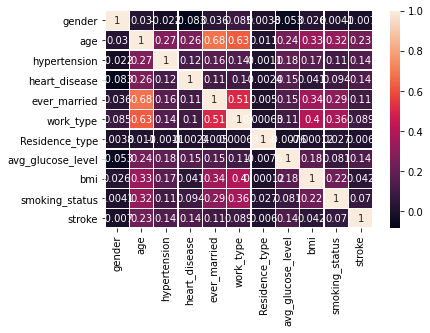

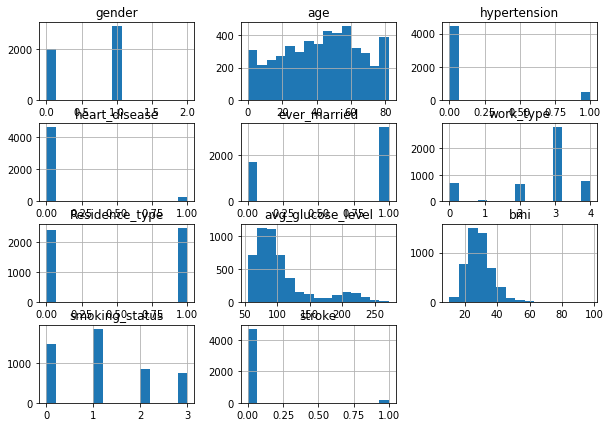

In [11]:
import seaborn as sns

"""`````````````````Data Visualization steps```````````````````````````"""
X.columns
Y.describe()
print("\n\n\n\n\n")
X[list(X.columns)].describe()
sns_heatmap=sns.heatmap(X.corr(),linewidths=.5, annot=True)
sns_heatmap.get_figure().savefig("output.png",quality=100,dpi=400,pad_inches=0.5)
X[list(X.columns)].hist(bins=15,figsize=(10, 7))


In [222]:
"""````````````````````Pre processing steps```````````````````````````````````````````````````````````"""
"""``````````````````````Data Cleaning ``````````````````````"""

# Feature selection from heatmap using correlation
Xd=X.drop(['Mitoses'], axis=1)
# Checking for null values
print("\n\nNUll values in dataset:\t", X.isnull().sum().sum()) #NO null values

# Checking for missing values for impuatation
Xd.dropna()

# Outlier detection preliminarily using quantiles 
def remove_outlier(d):
	    l = .05
	    h = .95
	    dq = d.quantile([l, h])

	    for n in list(d.columns):
	      if is_numeric_dtype(d[n]):
	            d = d[(d[n] > dq.loc[l, n]) & (d[n] < dq.loc[h, n])]
	    return d
# Outliers data frame
Xo=remove_outlier(Xd)
# The indexes of the list of outliers
Xoi=list(Xo.index.values.tolist())
print("The indexes of the list of outliers: ",Xoi)
print("\n\nOutliers:",remove_outlier(Xd)) 




NUll values in dataset:	 0
The indexes of the list of outliers:  [12, 24, 38, 44, 47, 49, 84, 99, 103, 107, 139, 190, 217, 221, 224, 285, 306, 335, 338, 400, 403, 419, 534, 610]


Outliers:      Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
12                 5                        3                         3   
24                 5                        2                         3   
38                 2                        5                         3   
44                 3                        7                         7   
47                 7                        8                         7   
49                 5                        3                         3   
84                 3                        3                         6   
99                 2                        3                         4   
103                7                        3                         4   
107                6                        5             

In [223]:
# Dropping the outliers dataframe
Xt=X[Xd.apply(lambda x: x.values.tolist() not in Xo.values.tolist(), axis=1)]
Yt=Y.drop(labels=Xoi)
print(Xt.shape,Yt.shape)
# Re-indexing after the removing the outliers
Xt.reindex(list(range(len(Xt))))
Yt.reindex(list(range(len(Yt))))


(659, 8) (659,)


0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
654    4.0
655    2.0
656    2.0
657    2.0
658    2.0
Name: Class, Length: 659, dtype: float64

In [224]:
"""``````````````````````Data Cleaning ``````````````````````"""
import sklearn
from sklearn import preprocessing

Xs = preprocessing.scale(Xt)
print(Xs)



[[ 0.20615441 -0.68164463 -0.7193991  ... -0.67271396 -0.15972933
  -0.58470653]
 [ 0.20615441  0.29276711  0.27797258 ...  1.78712976 -0.15972933
  -0.25621412]
 [-0.49776142 -0.68164463 -0.7193991  ... -0.39939799 -0.15972933
  -0.58470653]
 ...
 [ 0.20615441  2.24159057  2.27271595 ... -0.12608203  1.88022468
   2.37172522]
 [-0.1458035   1.59198275  0.94288704 ...  0.14723394  2.69620629
   1.05775555]
 [-0.1458035   1.59198275  1.60780149 ...  0.42054991  2.69620629
   0.40077072]]


In [6]:

"""````````````````````````````````````````CLASSIFIERS````````````````````````````````````````````"""
import sklearn
import sklearn.model_selection
import time
import sklearn.metrics
from time import process_time  
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn import svm,tree
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
from sklearn.preprocessing import KBinsDiscretizer
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
#  future warnings ignoring from sklearn
simplefilter(action='ignore', category=FutureWarning)


# Applying stratified k fold for cross validation on data set
CV = StratifiedKFold(n_splits=10, shuffle=True,random_state=2)

a=[]
t=[]
f_measure=[]
for i in range(7):
    a.append([])
    t.append([])
    f_measure.append([])
    
    

# Classifiers training and testing for performance
for train, test in CV.split(X,Y):
    Xt_train, Xt_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Classifiers initialization
    svc=svm.SVC(kernel='poly', C=1).fit(Xt_train, y_train)
    knn=KNeighborsClassifier(n_neighbors=22,p=2,metric='euclidean').fit(Xt_train, y_train)
    lg=LogisticRegression(max_iter=10000).fit(Xt_train, y_train)
    rf = RandomForestClassifier(max_depth=5).fit(Xt_train, y_train)
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(17,10,9,7,2),max_iter=10000, random_state=1).fit(Xt_train, y_train)
    dt=tree.DecisionTreeClassifier().fit(Xt_train, y_train)
    gnb = GaussianNB().fit(Xt_train, y_train)   


    """``````````````````````````Random Forest```````````````````````````````"""
    startrf=time.process_time()
    rf_pre=rf.predict(Xt_test)
    rf_result= cluster.contingency_matrix(y_test, rf_pre, eps=None, sparse=False)
    stoprf=time.process_time()
    timerf=stoprf-startrf
    # Metrics
    t[0].append(timerf)
    a[0].append(accuracy_score(y_test, rf_pre) )     
    f_measure[0].append(f1_score(y_test, rf_pre, average='micro'))


    """``````````````````````````KNN classifier``````````````````````````"""
    startknn=time.process_time()
    knn_pre=knn.predict(Xt_test)
    knn_result= cluster.contingency_matrix(y_test, knn_pre, eps=None, sparse=False)
    stopknn=time.process_time()
    timeknn=stopknn-startknn
    # Metrics
    t[1].append(timeknn)
    a[1].append(accuracy_score(y_test, knn_pre) )     
    f_measure[1].append(f1_score(y_test, knn_pre, average='micro'))
    

    """`````````````````Logistic regression classifier````````````````````"""
    startlg=time.process_time()
    lg_pre=lg.predict(Xt_test)
    lg_result= cluster.contingency_matrix(y_test, lg_pre, eps=None, sparse=False)
    stoplg=time.process_time()
    timelg=stoplg-startlg
    # Metrics
    t[2].append(timelg)
    a[2].append(accuracy_score(y_test, lg_pre) )     
    f_measure[2].append(f1_score(y_test, lg_pre, average='micro'))


    """`````````````````Decision tree classifier````````````````````"""
    startdt=time.process_time()
    dt_pre=dt.predict(Xt_test)
    dt_result= cluster.contingency_matrix(y_test, dt_pre, eps=None, sparse=False)
    stopdt=time.process_time()
    timedt=stopdt-startdt
    # Metrics
    t[3].append(timedt)
    a[3].append(accuracy_score(y_test, dt_pre))  
    f_measure[3].append(f1_score(y_test, dt_pre, average='micro')) 


    """```````````````````````````SVM classifier`````````````````````````"""
    startsvc=time.process_time()
    svc_pre=svc.predict(Xt_test)
    svc_result= cluster.contingency_matrix(y_test, svc_pre, eps=None, sparse=False)
    stopsvc=time.process_time()
    timesvc=stopsvc-startsvc
    # Metrics
    t[4].append(timesvc)
    a[4].append(accuracy_score(y_test, svc_pre) )     
    f_measure[4].append(f1_score(y_test, svc_pre, average='micro'))  

    """``````````````````````````Multi layer perceptron```````````````````````````````"""
    startmlp=time.process_time()
    mlp_pre=mlp.predict(Xt_test)
    mlp_result= cluster.contingency_matrix(y_test, mlp_pre, eps=None, sparse=False)
    stopmlp=time.process_time()
    timemlp=stopmlp-startmlp
    # Metrics
    t[5].append(timemlp)
    a[5].append(accuracy_score(y_test, mlp_pre))  
    f_measure[5].append(f1_score(y_test, mlp_pre, average='micro'))

    """```````````````````````````Gussian Navie Bayes classifier`````````````````````````"""
    startgnb=time.process_time()
    gnb_pre=gnb.predict(Xt_test)
    gnb_result= cluster.contingency_matrix(y_test, gnb_pre, eps=None, sparse=False)
    stopgnb=time.process_time()
    timegnb=stopgnb-startgnb
    # Metrics
    t[6].append(timegnb)
    a[6].append(accuracy_score(y_test, gnb_pre) )     
    f_measure[6].append(f1_score(y_test, gnb_pre, average='micro'))   





In [7]:
"""```````````````````````````````````````````````Statistics````````````````````````````````````"""
import statistics as st
import scipy.stats as sc
from scipy.stats import friedmanchisquare
from sklearn.metrics import cluster

# Metrics collection for each fold
ab=[]
tb=[]
fb=[]
for i in range(10):
    # each fold
    ab.append([])
    tb.append([])
    fb.append([])
    for k in range(7):
        ab[i].append(a[k][i])
        tb[i].append(t[k][i])
        fb[i].append(f_measure[k][i])


In [8]:
"""`````````````````````````` Friedman test measurements definition````````````````````````````````"""
def friedman_test(ab,n):
    print("\n\n Friedman test")   
    ft=[]
    critical=7.8
    Result=[]
    for i in range(10):
        Result.append([])

    if(n==1):
        for i in range(10):
            ft.append(sc.rankdata(ab[i], method='ordinal'))

        np.array(ab).T.tolist()
        for i in range(10):
            for k in range(7):
                Result[i].append(ab[i][k])
                Result[i].append(ft[i][k])

        result = np.vstack(Result)
        print(pd.DataFrame(data=result, columns=["RF","rank","KNN","rank","LR","rank","DT","rank","SVM","rank","MLP","rank","GNB","rank"],index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']))

    else:
        temp=[]
        for i in range(10):
            temp=pd.Series(sc.rankdata(ab[i], method='ordinal'))
            ft.append(temp.rank(ascending=False))
            temp=[]
        np.array(ab).T.tolist()
        print(ab[9][0])
        for i in range(10):
            for k in range(7):
                Result[i].append(ab[i][k])
                Result[i].append(ft[i][k])
        result = np.vstack(Result)
        print(pd.DataFrame(data=result, columns=["RF","rank","KNN","rank","LR","rank","DT","rank","SVM","rank","MLP","rank","GNB","rank"],index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']))


    np.array(ab).T.tolist()
    avg1=[]
    for i in range(7):
        avg1.append(round(mean(ab[i]),3))
    print("Average",avg1)

    FS,cd = friedmanchisquare(ab[0],ab[1],ab[2],ab[3],ab[4],ab[5],ab[6])
    if(cd<0.05):     
	    print('\n\nThe Friedman value is less than critical value.\nClassifiers distribution is same---Null Hypothesis accepted')
    else: 
        print('\n\nThe Friedman value is greater than critical value. \nClassifiers distribution is different---Null Hypothesis rejected')
        np.array(ft).T.tolist()
        nemeyi(ft)
   

In [9]:
from statistics import mean
# # Nemeyi test definition
def nemeyi(abc):
    # critical differnce for 7 algorithms
    cd=(2.323)*((28/5)**0.5)
    avg=[]
    diff=[]
    for i in range(7):
        avg.append(mean(abc[i]))
    for i in range(7):
        if((i+1)!=7):
            diff.append(abs(avg[i]-avg[i+1]))
        else:
            diff.append(abs(avg[i]-avg[0]))
    for i in range(7):
        if(cd<diff[i]):
            if((i+1)!=7):
                print('Algorithm',i+1,'and Algorithm',i+2,'show significant difference')
            else:
                print('Algorithm',i+1,'and Algorithm 1 show significant difference')
            

In [10]:
"""```````````````````````````````````````Metrics and statistics````````````````````"""
# Accuracy measurements of the classifiers
print("Predictive performance---Accuarcy measurements")
friedman_test(ab,0)

# F-meaures of the classifiers
print("\n\nPredictive performance---F-measures")
friedman_test(fb,0)


# Time measurements of the classifiers
print("\n\nComputational performance---Time measurements")
friedman_test(tb,1)



Predictive performance---Accuarcy measurements


 Friedman test
1.0
     RF  rank       KNN  rank   LR  rank   DT  rank       SVM  rank       MLP  \
1   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
2   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
3   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
4   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.997963   
5   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
6   1.0   5.0  0.957230   7.0  1.0   4.0  1.0   3.0  0.957230   6.0  1.000000   
7   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
8   1.0   5.0  0.957230   7.0  1.0   4.0  1.0   3.0  0.957230   6.0  1.000000   
9   1.0   4.0  0.957230   7.0  1.0   3.0  1.0   2.0  0.957230   6.0  0.957230   
10  1.0   5.0  0.959184   7.0  1.0   4.0  1.0   3.0  0.959184   6.0  1.000000   

    rank  GNB  rank  
1    5.0  1.0   1.